In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D
from tensorflow.keras.regularizers import L2
from tensorflow.keras import Sequential
from easydict import EasyDict

2023-08-21 14:04:13.375592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-21 14:04:13.520668: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-21 14:04:13.521941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 14:04:14.312634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Config cell
conv2d_cfg = EasyDict()
conv2d_cfg.INPUT_SHAPE = (4, 28, 28, 3)


model_cfg = EasyDict()
model_cfg.MODEL_NUM_CLASSES = 10 

In [4]:
def createRandom3DTensor(batch_size, width, height, channels): 
    # Create a random 3D tensor with dimensions [batch_size, width, height, channels]
    input_feature_map = tf.random.normal((batch_size, width, height, channels))
    return input_feature_map

In [5]:
def plotSampleFeatureMap(sample_feature_map, sample_idx, channel_idx): 
    # Select a specific sample and channel from the input feature map
    selected_map = sample_feature_map[sample_idx, :, :, channel_idx]
    # Visualize the selected feature map
    plt.imshow(selected_map.numpy(), cmap='viridis')
    plt.title(f'Feature Map (Sample {sample_idx}, Channel {channel_idx})')
    plt.colorbar()
    plt.show()

2023-08-21 14:04:36.197736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-21 14:04:36.198178: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


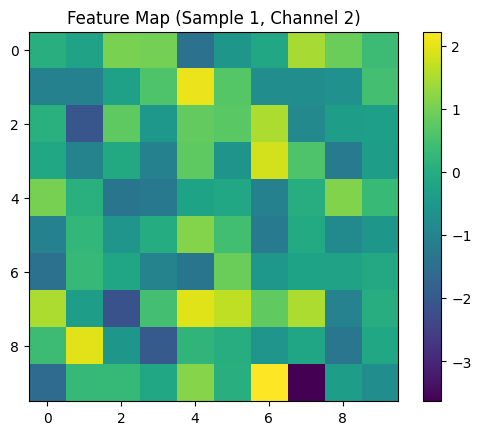

In [6]:
tensor = createRandom3DTensor(10, 10, 10, 3)
plotSampleFeatureMap(tensor, 1, 2) 

In [7]:
def plotTheWholeTensor(input_feature_map):
    shape = tf.shape(input_feature_map) 
    batch_size = shape[0]
    width = shape[1]
    height = shape[2]
    channels = shape[3]

    for batch_idx in range(batch_size): 
        for channel_idx in range(channels): 
            plt.figure()
            plt.title(f"Batch {batch_idx}, Channel {channel_idx}")
            plt.imshow(input_feature_map[batch_idx, :, :, channel_idx], cmap='gray')
            plt.show()

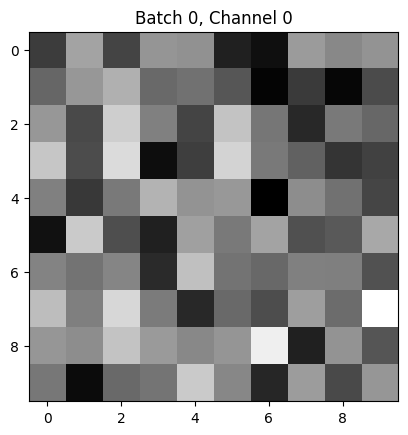

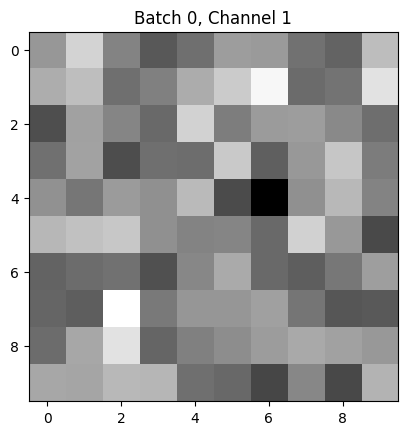

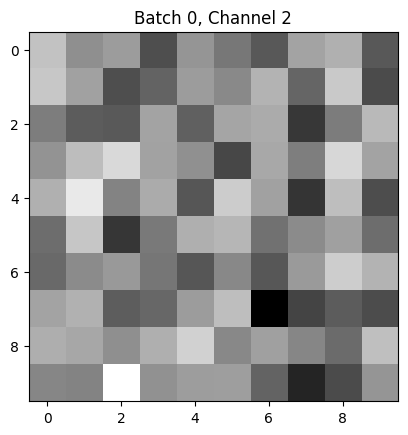

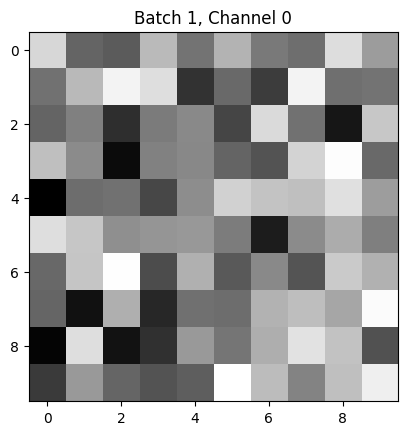

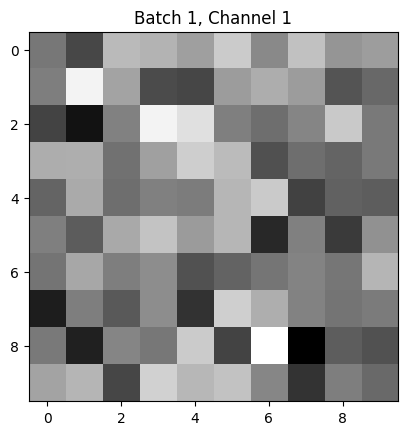

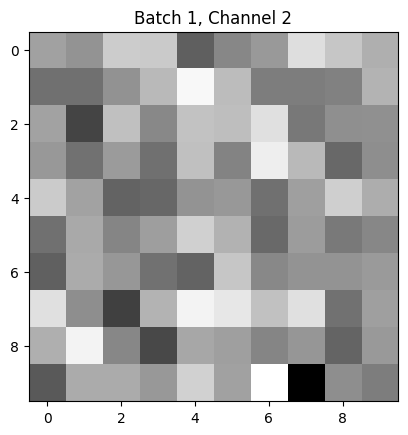

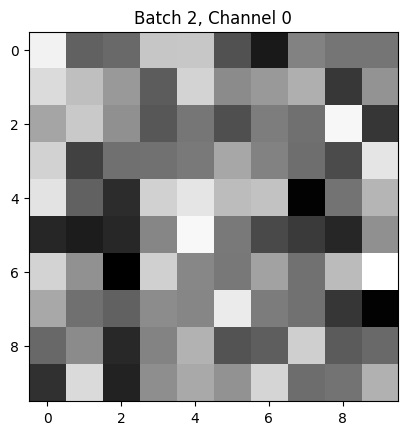

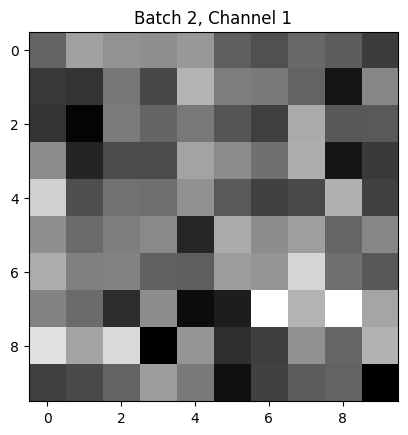

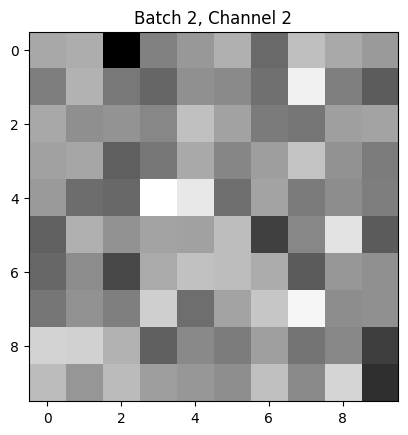

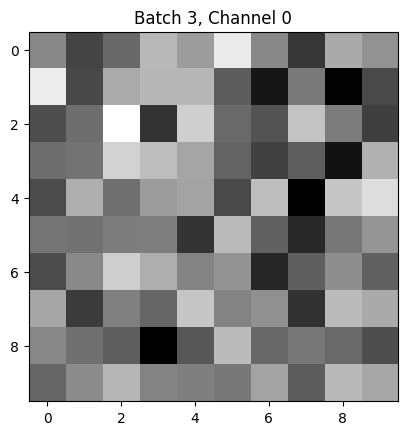

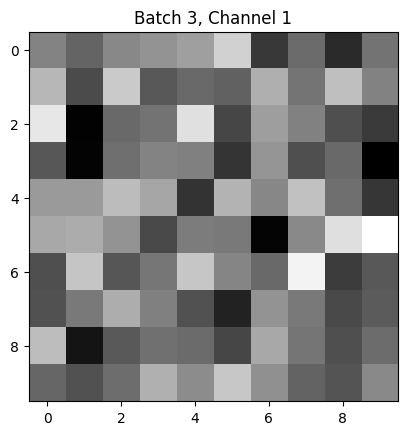

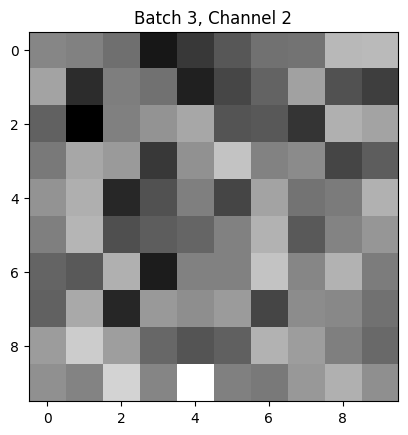

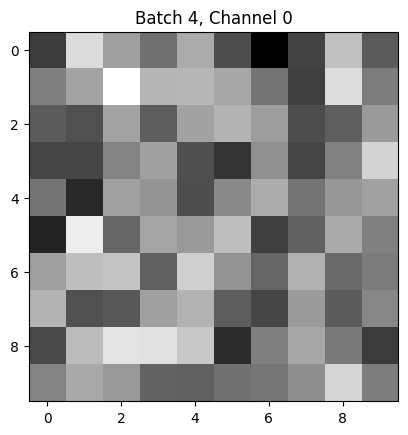

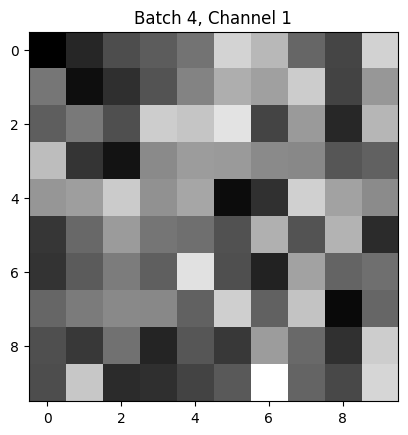

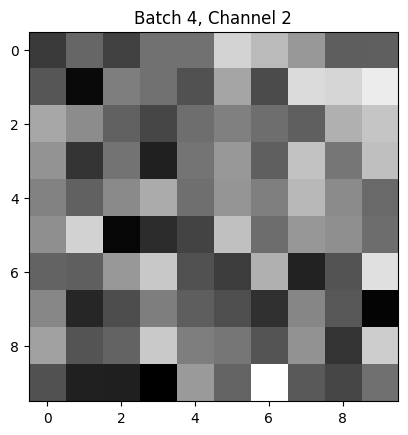

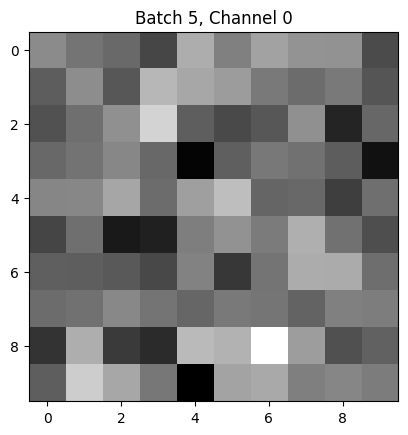

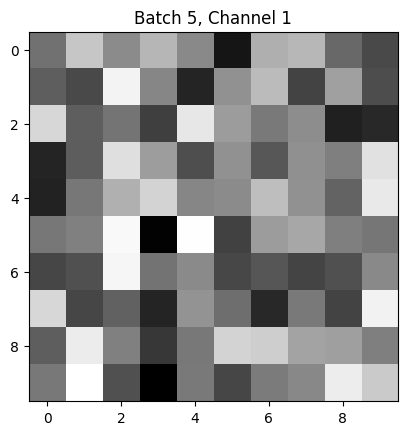

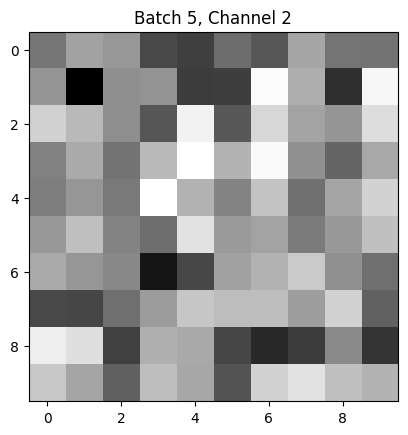

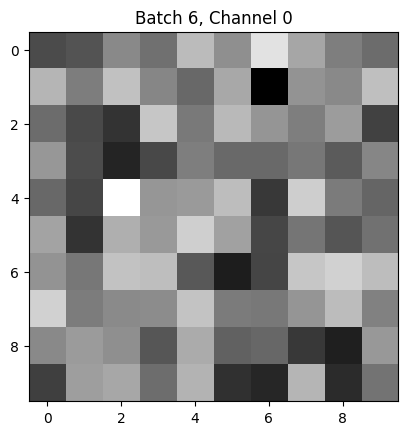

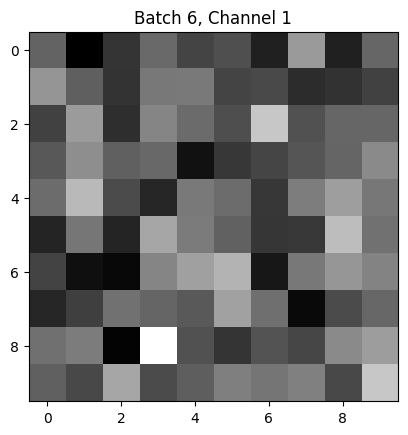

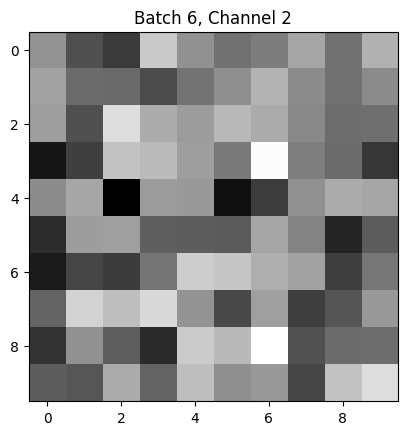

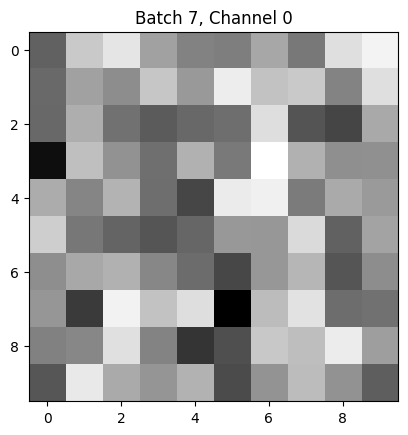

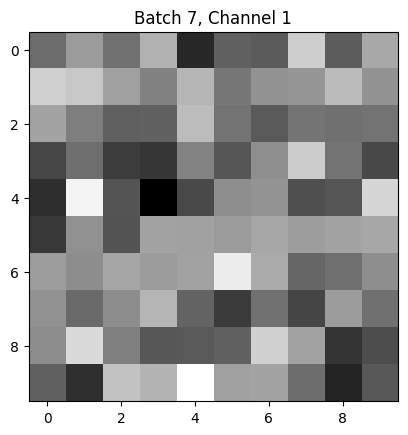

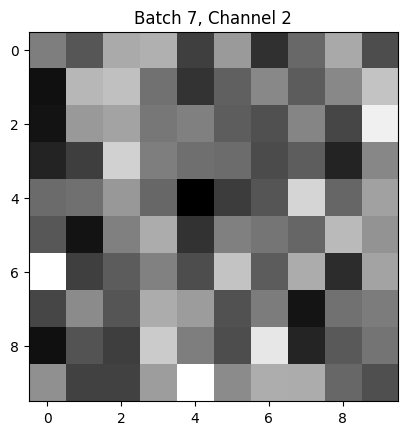

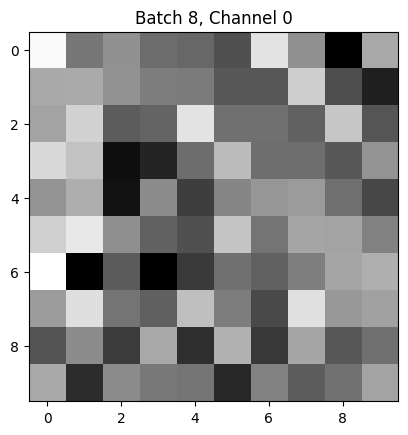

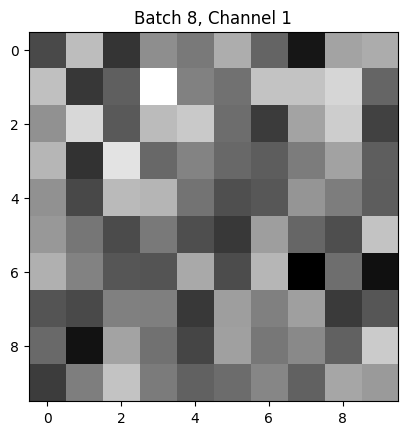

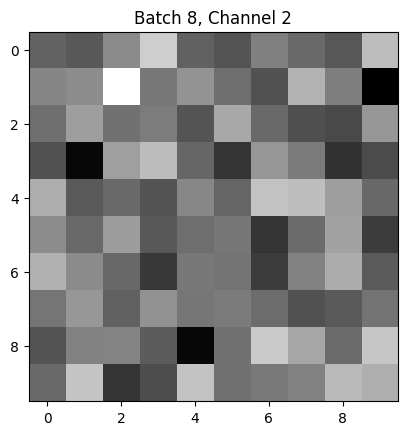

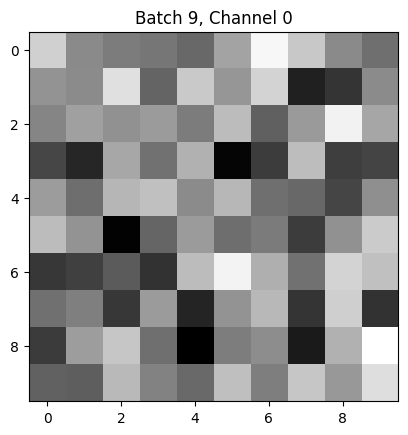

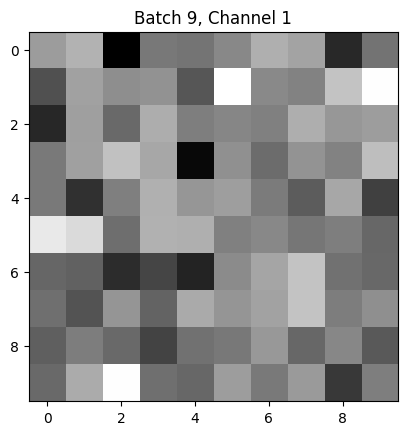

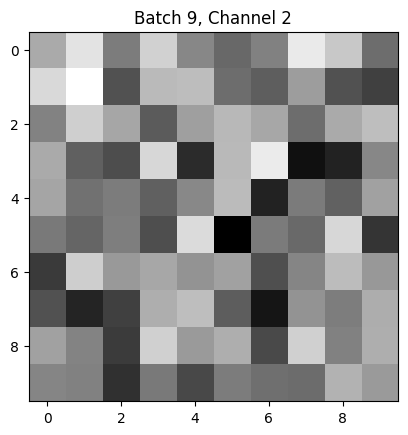

In [8]:
plotTheWholeTensor(tensor)

In [9]:
def se_block(in_block, ch, ratio=16): 
    x = GlobalAveragePooling2D()(in_block)
    x = Dense(ch//ratio, activaton="relu")(x)
    x = Dense(ch, activation="sigmoid")(x)
    return multiply()([in_block, x])

In [13]:
def create_convolutional_model(input_shape, num_classes): 
    # Create an empty model
    model = Sequential()
    
    # Add Conv2D Layers
    model.add(
        Conv2D(
                filters=10, 
                kernel_size=3
    ))
    return model

In [15]:
cfg = EasyDict()
cfg.INPUT_SHAPE = (4, 28, 28, 3) 
cfg.NUM_CLASSES = 10 

model = create_convolutional_model(cfg.INPUT_SHAPE, cfg.NUM_CLASSES)
model.compile() 

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.